In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

# Reading the DataSet

In [2]:
import pandas as pd
df = pd.read_csv('taitanic.csv')

In [3]:
df.shape

(891, 12)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [7]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [8]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

# Check Missing Values

In [9]:
s = df.isnull().sum()
s

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
s[s>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

# Saperate X &  Y values

In [11]:
X = df.drop(labels=['PassengerId','Name','Ticket','Survived'],axis=1)
Y = df[['Survived']]

In [12]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [13]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


# Creating a pipeline

In [14]:
cat = list(X.columns[X.dtypes == 'object'])
con = list(X.columns[X.dtypes != 'object'])

In [15]:
cat

['Sex', 'Cabin', 'Embarked']

In [16]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [17]:
cat1 = ['Cabin']
cat2 = ['Sex','Embarked']

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing  import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [32]:
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])

cat_pipe1 = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='Unknown')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore'))])

cat_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore'))])

pre = ColumnTransformer([('num',num_pipe,con),
                         ('cat1',cat_pipe1,cat1),
                         ('cat2',cat_pipe2,cat2)])



In [35]:
X_pre = pre.fit_transform(X).toarray()
X_pre

array([[ 0.82737724, -0.56573646,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.66386103,  0.43279337, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.25833709, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693, -0.25833709, -0.4745452 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.20276197, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ]])

In [36]:
cols = pre.get_feature_names_out()

In [37]:
cols

array(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat1__Cabin_A10', 'cat1__Cabin_A14', 'cat1__Cabin_A16',
       'cat1__Cabin_A19', 'cat1__Cabin_A20', 'cat1__Cabin_A23',
       'cat1__Cabin_A24', 'cat1__Cabin_A26', 'cat1__Cabin_A31',
       'cat1__Cabin_A32', 'cat1__Cabin_A34', 'cat1__Cabin_A36',
       'cat1__Cabin_A5', 'cat1__Cabin_A6', 'cat1__Cabin_A7',
       'cat1__Cabin_B101', 'cat1__Cabin_B102', 'cat1__Cabin_B18',
       'cat1__Cabin_B19', 'cat1__Cabin_B20', 'cat1__Cabin_B22',
       'cat1__Cabin_B28', 'cat1__Cabin_B3', 'cat1__Cabin_B30',
       'cat1__Cabin_B35', 'cat1__Cabin_B37', 'cat1__Cabin_B38',
       'cat1__Cabin_B39', 'cat1__Cabin_B4', 'cat1__Cabin_B41',
       'cat1__Cabin_B42', 'cat1__Cabin_B49', 'cat1__Cabin_B5',
       'cat1__Cabin_B50', 'cat1__Cabin_B51 B53 B55',
       'cat1__Cabin_B57 B59 B63 B66', 'cat1__Cabin_B58 B60',
       'cat1__Cabin_B69', 'cat1__Cabin_B71', 'cat1__Cabin_B73',
       'cat1__Cabin_B77', 'cat1__Cabin_B78', 'c

In [38]:
len(cols)

158

In [39]:
X_pre = pd.DataFrame(X_pre,columns=cols)

In [41]:
X_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat1__Cabin_A10,cat1__Cabin_A14,cat1__Cabin_A16,cat1__Cabin_A19,cat1__Cabin_A20,...,cat1__Cabin_F38,cat1__Cabin_F4,cat1__Cabin_G6,cat1__Cabin_T,cat1__Cabin_Unknown,cat2__Sex_female,cat2__Sex_male,cat2__Embarked_C,cat2__Embarked_Q,cat2__Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [42]:
Y.value_counts()

Survived
0           549
1           342
Name: count, dtype: int64

# Train Test Split

In [43]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest =train_test_split(X_pre,Y,test_size=0.2, random_state=62)

In [44]:
xtrain.shape

(712, 158)

In [45]:
xtest.shape

(179, 158)

# Model Creation

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=42)
model.fit(xtrain,ytrain)

GradientBoostingClassifier(random_state=42)

In [47]:
model.score(xtrain,ytrain)

0.8904494382022472

In [48]:
model.score(xtest,ytest)

0.8324022346368715

# Hyperparameter Tuning

In [51]:
params = { 'learning_rate':[0.0001,0.01,0.05,0.1],
          'n_estimators':[10,50,100,200],
          'max_depth':[3,4,5,6,7,8,9,10],
          'min_samples_split':[6,7,8,9,10]
        }

In [52]:
from sklearn.model_selection import RandomizedSearchCV
gbc = GradientBoostingClassifier(random_state=42)
rscv = RandomizedSearchCV(gbc, param_distributions=params, cv=5, scoring='f1')
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   param_distributions={'learning_rate': [0.0001, 0.01, 0.05,
                                                          0.1],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'min_samples_split': [6, 7, 8, 9, 10],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='f1')

In [53]:
rscv.best_params_

{'n_estimators': 50,
 'min_samples_split': 9,
 'max_depth': 9,
 'learning_rate': 0.1}

In [54]:
rscv.best_score_

0.7485465629375689

In [56]:
best_gbc = rscv.best_estimator_
best_gbc

GradientBoostingClassifier(max_depth=9, min_samples_split=9, n_estimators=50,
                           random_state=42)

# Evaluate Best GBC

In [57]:
best_gbc.score(xtrain,ytrain)

0.9606741573033708

In [58]:
best_gbc.score(xtest,ytest)

0.8379888268156425

# Predecting Training and Testing Data

In [59]:
ypred_tr = best_gbc.predict(xtrain)
ypred_ts = best_gbc.predict(xtest)

In [61]:
ypred_tr[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [62]:
ytrain.head()

,Survived
275,1
351,0
312,0
116,0
249,0


In [63]:
ypred_ts[0:5]

array([0, 1, 1, 1, 1], dtype=int64)

In [64]:
ytest.head()

,Survived
204,1
835,1
291,1
78,1
472,1


# Confusion Matrix

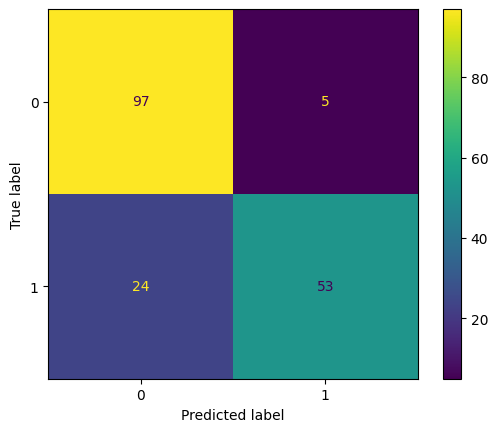

In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf,display_labels=best_gbc.classes_)
cfd.plot()

# Perfom Classification Report

In [66]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       102
           1       0.91      0.69      0.79        77

    accuracy                           0.84       179
   macro avg       0.86      0.82      0.83       179
weighted avg       0.85      0.84      0.83       179

